# seaborn 라이브러리 자유자재로 사용하기
#### 위에서는  seaborn 라이브러리의 tips 데이터 집합만 사용했지만 seaborn 라이브러리를 활용해서 그래프를 그려보자!

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset('tips')
anscombe = sns.load_dataset('anscombe')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 단변량 그래프 그리기 - 히스토그램( 데이터의 분포 확인)

Text(0, 0.5, 'Frequency')

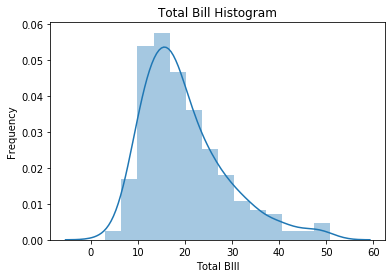

In [90]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

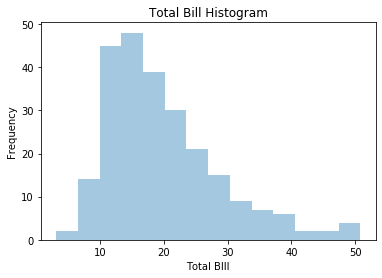

In [91]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde=False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total BIll')
ax.set_ylabel('Frequency')

## 밀집도 그래프만 나타내려면 hist= False


Text(0, 0.5, 'Unit Probability')

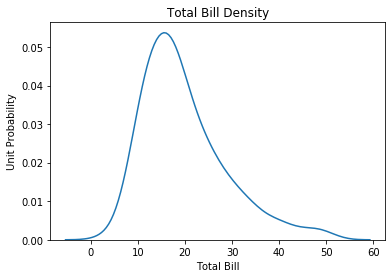

In [92]:
ax = plt.subplot()
ax = sns.distplot(tips['total_bill'], hist= False)
ax.set_title("Total Bill Density")
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')

## 실무 환경에서는 데이터 시각화를 더 효울적으로 하기 위해 여러 그래프를 한번에 출력하는 경우가 많음

Text(0.5, 0, 'Total Bill')

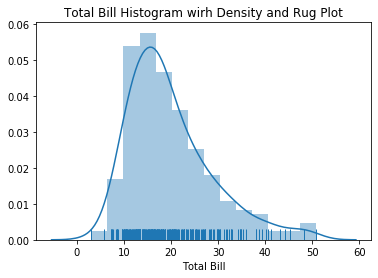

In [93]:
ax = plt.subplot()
ax = sns.distplot(tips['total_bill'], rug=True)
ax.set_title('Total Bill Histogram wirh Density and Rug Plot')
ax.set_xlabel("Total Bill")

## count 그래프: 이산값을 나타낸 그래프

Text(0, 0.5, 'Frequency')

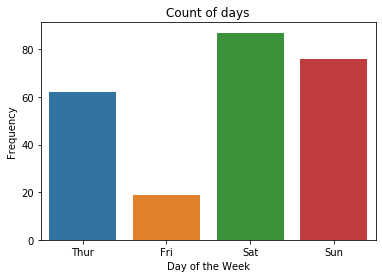

In [94]:
ax = plt.subplot()
ax = sns.countplot('day', data=tips)
ax.set_title("Count of days")
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

### seaborn 라이브러리로 산점도 그래프 그리기
regplot 메소드를 사용해서 산점도 그래프와 회귀선 을 함계 그릴 수 있다
만약 회기선을 제거하려면 fit_reg = False로 지정하면 된다

Text(0, 0.5, 'Tip')

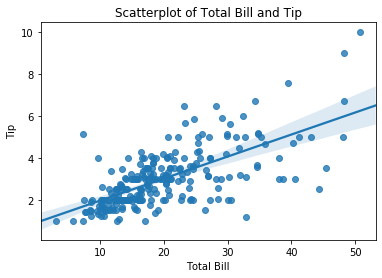

In [95]:
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

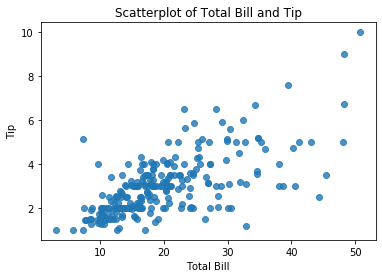

In [96]:
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

## 산점도 그래프와 히스토그램을 한번에 그려주는 jointplot 메서드

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

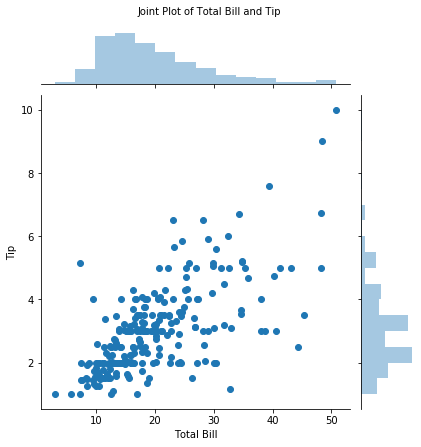

In [97]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel="Total Bill", ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize = 10, y =1.03)

### 산점도 그래프는 점이 겹쳐 보일 경우 점을 구분하기 어렵다는 단점이 있다. 그래프의 데이터를 구분하기 쉽게 그리고 싶다면 육각 그래프를 사용해라

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

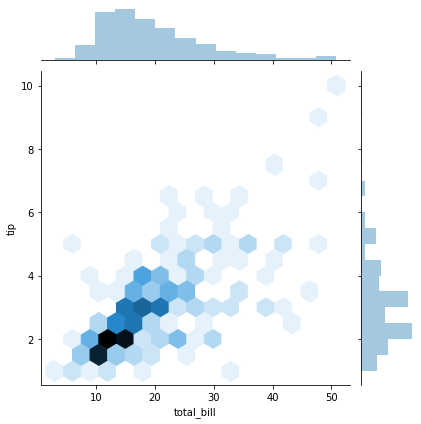

In [98]:
hexbin = sns.jointplot(x='total_bill', y='tip', data= tips, kind='hex')
joint.set_axis_labels(xlabel="Total Bill", ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize = 10, y =1.03)

## 이차원 밀집도 그리기
이차원 밀집도는 kdeplot 메서드로 만들 수있다

Text(0, 0.5, 'Tip')

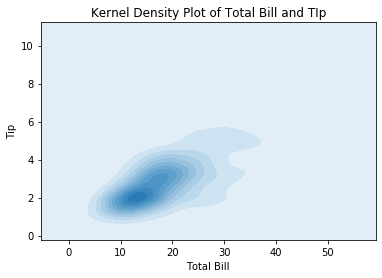

In [99]:
ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'],
                 data2=tips['tip'],
                 shade = True)
ax.set_title('Kernel Density Plot of Total Bill and TIp')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')


### bar 그래프 그리기

Text(0, 0.5, 'Average total bill')

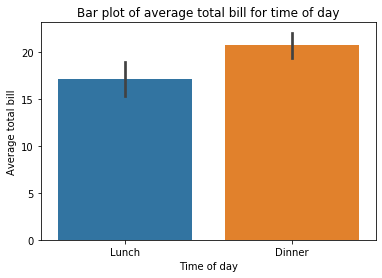

In [100]:
ax = plt.subplot()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

Text(0, 0.5, 'Total Bill')

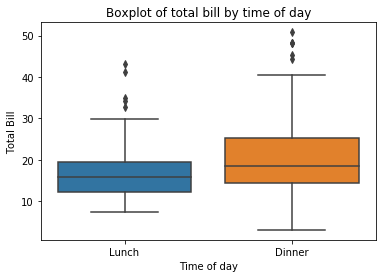

In [101]:
ax = plt.subplot()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

### 박스 그래프는 다양한 통계 수치를 확인하기 위해 자주 사용하는 그래프지만 데이터 분산이 모호하게 표현된다.--> 박스 그래프에 커널 밀도를 추정한 바이올린 그래프를 사용하면 됨

Text(0, 0.5, 'Total Bill')

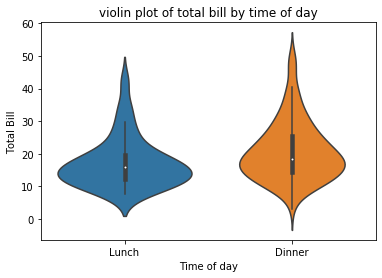

In [102]:
ax = plt.subplot()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

## 관계 그래프 그리기 
여태까지 해온 그래프를 총합한 그래프
이떄 관계 그래프는 중복된 정보가 표현된다는 단점이 있다, 즉 관계 그래프의 절반은 나머지 절반과 같다 --> 이러한 경우에는 중복된 그래프가 그려지는 위치를 직접 지정하여
원하는 그래프로 교체하면 됩니다.

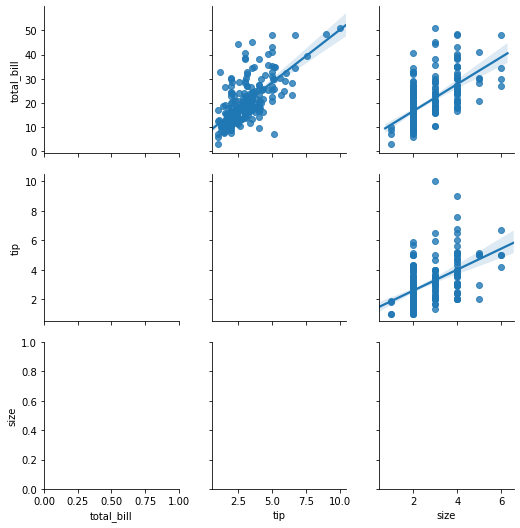

In [103]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)

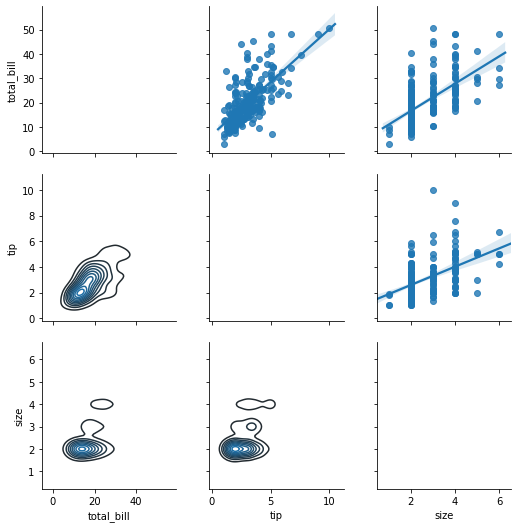

In [104]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)

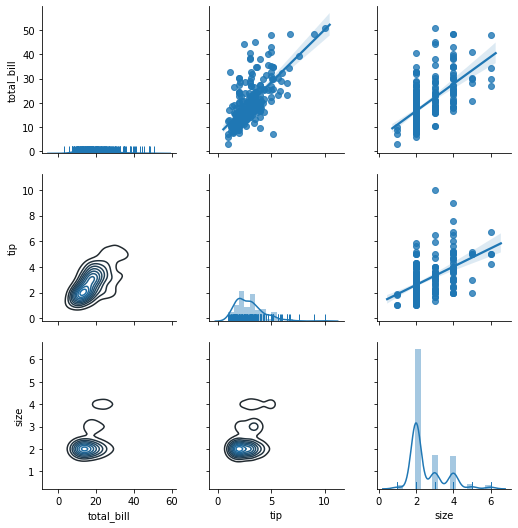

In [105]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)
plt.show()

## 다변량 그래프 그리기

### seaborn 라이브러리로 바이올린 그래프 그리기 - 색상추가
hue= "열값" 을통해서 알수 있다


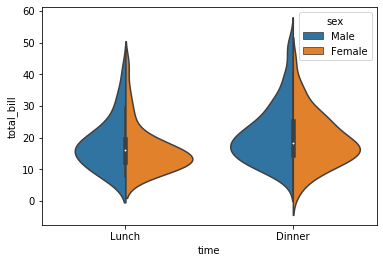

In [106]:
ax = plt.subplot()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data= tips, split=True)

In [107]:
type(tips)
tips.keys() # 인덱스 가져오기
tips.values # 행값 가져오기
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## 산점도,관계 그래프 그리기 - 색상 추가

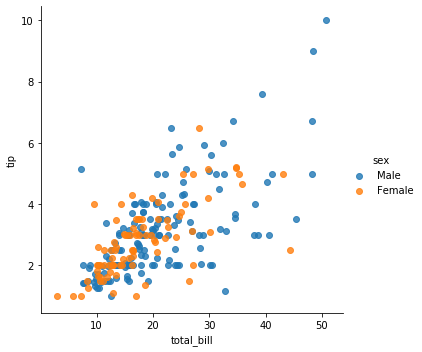

In [108]:
scatter = sns.lmplot(x='total_bill',y='tip' ,data=tips, hue='sex', fit_reg=False,
                    )

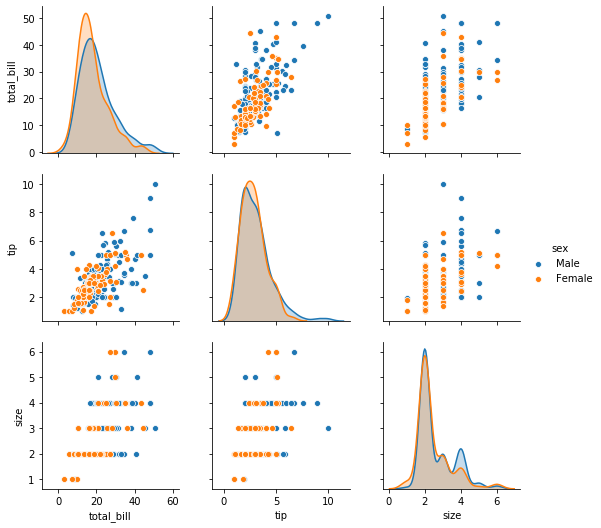

In [109]:
fig = sns.pairplot(tips, hue='sex')

### 산점도 그래프의 크기와 모양 조절하기

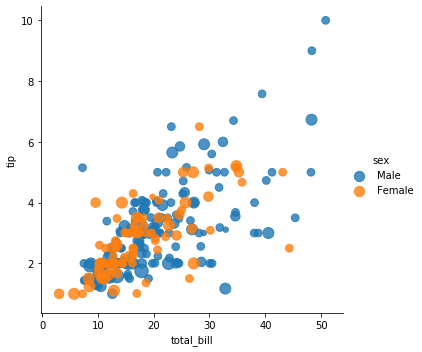

In [110]:
scatter = sns.lmplot(x='total_bill',y='tip' ,data=tips, hue='sex', fit_reg=False,
                    scatter_kws={'s': tips['size']*30})

## 산점도의 그래프의 점을 다른 기호로 표현하기

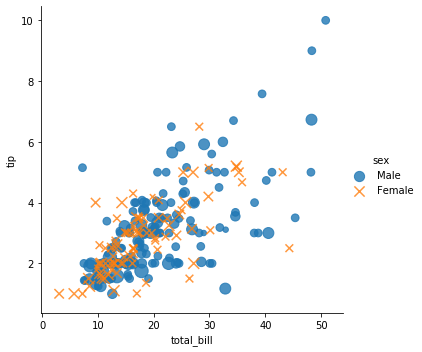

In [111]:
scatter = sns.lmplot(x='total_bill',y='tip' ,data=tips, hue='sex', markers=['o','x'],
                    scatter_kws={'s': tips['size']*30}, fit_reg= False)

lmplot 메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기

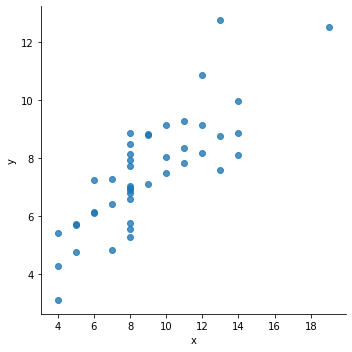

In [115]:
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False)

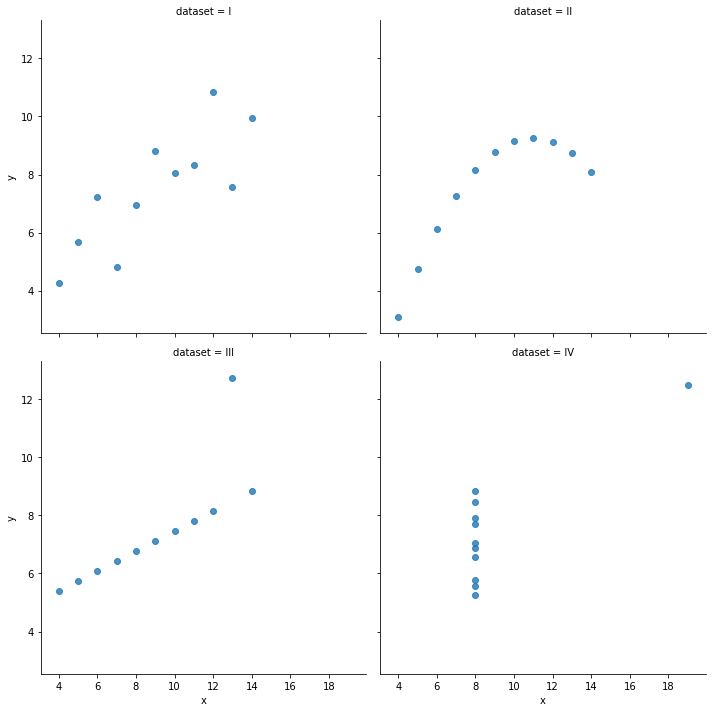

In [116]:
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False,
                          col='dataset', col_wrap=2)